## Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM»

In [3]:
!wget ftp://ftp.cs.toronto.edu/pub/neuron/delve/data/tarfiles/adult.tar.gz
!tar xzf adult.tar.gz
!gzip -d adult/Dataset.data.gz

--2022-10-22 07:52:55--  ftp://ftp.cs.toronto.edu/pub/neuron/delve/data/tarfiles/adult.tar.gz
           => ‘adult.tar.gz’
Resolving ftp.cs.toronto.edu (ftp.cs.toronto.edu)... 128.100.3.31
Connecting to ftp.cs.toronto.edu (ftp.cs.toronto.edu)|128.100.3.31|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/neuron/delve/data/tarfiles ... done.
==> SIZE adult.tar.gz ... 1849361
==> PASV ... done.    ==> RETR adult.tar.gz ... done.
Length: 1849361 (1.8M) (unauthoritative)

adult.tar.gz        100%[===================>]   1.76M  3.77MB/s    in 0.5s    

2022-10-22 07:52:57 (3.77 MB/s) - ‘adult.tar.gz’ saved [1849361]



In [1]:
import pandas as pd

In [4]:
column_names = ["age", "workclass", "fnlwgt", "education", "educational-num", 
                "marital-status", "accupation", "relationship", "race", 
                "gender", "capital-gain", "capital-loss", "hours-per-week",
                "native-country", "income"]
data = pd.read_csv("adult/Dataset.data", sep=" ", header=None)
data.columns = column_names
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,accupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Проверяем данные на пропуски и типы данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   accupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Посмотрим на перекос данных

In [6]:
data.groupby("income").count()["age"]

income
<=50K    37155
>50K     11687
Name: age, dtype: int64

Получаем уникальные значения котегориальных признаков

In [38]:
cat_columns_with_income = ["workclass", "education", "marital-status", "accupation", "relationship", 
            "race", "gender", "native-country", "income"]
for col in cat_columns_with_income:
    print(col, data[col].unique())

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
accupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

Трансформируем категориальные признаки с помощью one-hot encoder

In [39]:
X = pd.get_dummies(data, columns = cat_columns_with_income)


Матрица корреляции признаков


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


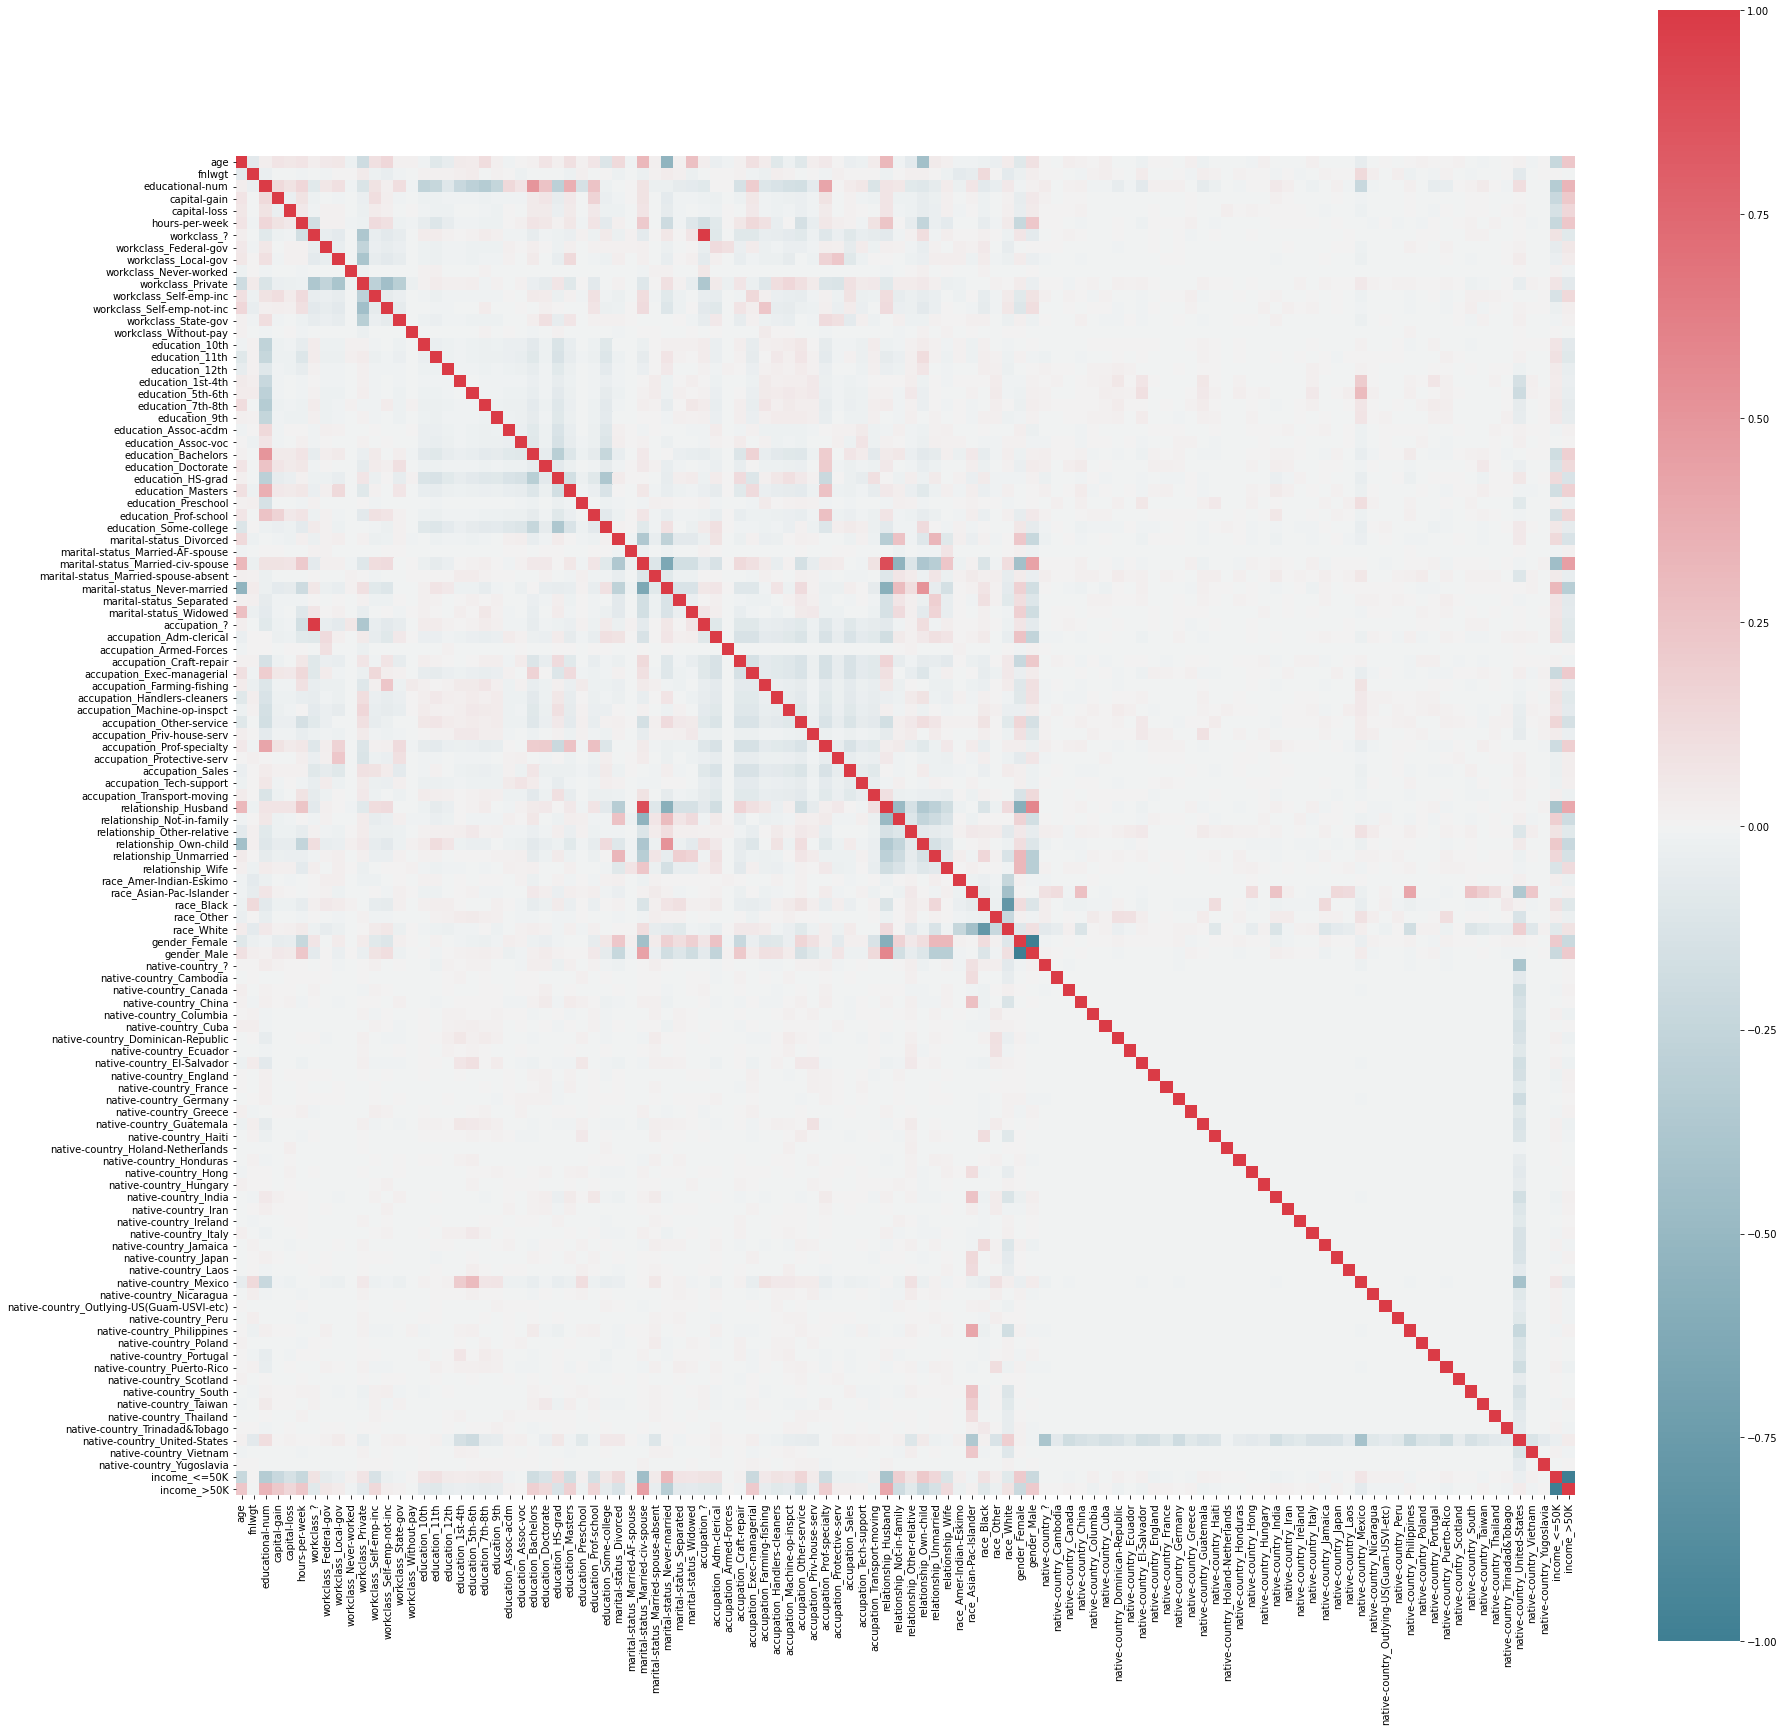

In [40]:
f, ax = plt.subplots(figsize=(30,30))
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Что любопытно workclass == "?" сильно коррелирует с accupation == "?"
Хорошо заметны корреляции income от некоторых признаков.

В первом приближении будем считать неизвестный клас "?" как отдельный клас.
 

Сохраняем один из классов целевой переменной, как `y` и удаляем целевую переменную из датасета



In [16]:
y = X["income_>50K"]
del X["income_>50K"]
del X["income_<=50K"]

In [17]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income_>50K, dtype: uint8

# Логистическая регрессия
Для начала попробуем логистическую регрессию "в лоб" без нормализации и стандартизации

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(max_iter=1000)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Точность модели

In [23]:
model.score(X_train, y_train)


0.7979167199856678

In [24]:
model.score(X_test, y_test)

0.7986487869792199

Попробуем удалить данные, в которых категориальные признаки неизвестны

In [41]:
cat_columns = cat_columns_with_income.copy()
cat_columns.remove("income")
for col in cat_columns:
    data_cleaned = data[data[col] != "?"]

Сколько данных удалено:

In [42]:
len(data) - len(data_cleaned)

857

Далее проделываем все теже самые операции и сравниваем результат

In [43]:
X = pd.get_dummies(data_cleaned, columns = cat_columns_with_income)
y = X["income_>50K"]
del X["income_>50K"]
del X["income_<=50K"]
model = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.score(X_train, y_train)

0.7985828904866104

In [44]:
model.score(X_test, y_test)

0.796603105137022

Результат оказался несколько хуже на тестовых данных, видимо из-за потери исходных данных в количестве 857. Поэтому возвращаемся к первому варианту, без удаления данных с неизвестными значениями признаков

In [65]:
X = pd.get_dummies(data, columns = cat_columns_with_income)
y = X["income_>50K"]
del X["income_>50K"]
del X["income_<=50K"]

Для решения вопроса с пропусками в признаках можно попробовать воспользоваться тремя путями:
1. Заменить "?" на наиболее часто встречающийся признак
2. Заменить "?" на наиболее часто встречающийся признак и добавить признак того, что это предполагаемое значение (добавить размерность)
3. Найти корреляцию с другими признаками и предположить возможное значение
4. Предположить значение на основе других признаков. Т.е. фактически построить модель, где меткой будет искомый признак, а признаками все остальные данные

## Логистическая регрессия + Стандартизация
Получим статистику по числовым признакам

In [66]:
num_columns = ["age", "fnlwgt", "educational-num", "capital-gain", 
               "capital-loss", "hours-per-week"]
data[num_columns].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [68]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [71]:
model.score(X_train, y_train)

0.8540680265144729

In [72]:
model.score(X_test, y_test)

0.8518783908281298

Видим существенное улучшение качества модели

## Логистическая регрессия + Нормализация

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
model = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000))

In [55]:
model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [56]:
model.score(X_train, y_train)

0.8528651498477209

In [57]:
model.score(X_test, y_test)

0.8494216398812571

Как видим, нормализация дает чуть худший результат, чем стандартизация.

### SVM
Для начала воспользуемся SVM без предобработки

In [116]:
from sklearn.svm import SVC

In [118]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [119]:
model.score(X_train, y_train)

0.7977375681416835

In [120]:
model.score(X_test, y_test)

0.7990582454703654

## SVM + Стандартизация

In [121]:
model = make_pipeline(StandardScaler(), SVC())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [123]:
model.score(X_train, y_train)

0.8628976531108438

In [124]:
model.score(X_test, y_test)

0.8468625243115979

Использование стандартизации дает лучший результат, чем использование SVC в "лоб"

## SVM + Нормализация

In [126]:
model = make_pipeline(MinMaxScaler(), SVC())
model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [127]:
model.score(X_train, y_train)

0.8472858495636373

In [128]:
model.score(X_test, y_test)

0.8370355205241069

Как и для логистической регресии наилучшим предобработчиком стал `StandardScaler`

## Итог
| model                               | train score | test score |
|-------------------------------------|-------------|------------|
| LogisticRegression                  |0.7979       |0.7986      |
| LogisticRegression + StandardScaler |0.8540       |0.8518      |
| LogisticRegression + MinMaxScaler   |0.8528       |0.8494      |
| SVM                                 |0.7977       |0.7990      |
| SVM + StandardScaler                |0.8628       |0.8468      |
| SVM + MinMaxSclaer                  |0.8472       |0.8370      |



Для улучшения качества модели можно воспользоваться тремя подходами:
1. Заполнить пропущенные признаки
2. Использовать метод кросс-валидации при обучении
3. Использовать подбор гиперпараметров для достижения максимального результата